In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import sys
sys.path.append('..')
import clusterizer

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Totale ordening in Clusters

Als location_range and time_range beide None zijn, dan is het Cluster het kleinst mogelijke cluster. Anders wordt het gesorteerd volgens het volgende principe:

1) Als iets None is, dan wordt het niet meegenomen in de vergelijking.

2) In een location/time scatter is linksonder het kleinst en rechtsboven het grootst

3) Tijd is belangrijker dan locatie

In [6]:
clusterNoneNone = clusterizer.cluster.Cluster()
cluster01None = clusterizer.cluster.Cluster(location_range = (0,1))
cluster12None = clusterizer.cluster.Cluster(location_range = (1,2))
cluster02None = clusterizer.cluster.Cluster(location_range = (0,2))

print("NoneNone < 01None: " + str(clusterNoneNone < cluster01None))
print("01None < 12None" + str(cluster01None < cluster12None))
print("01None < 02None: " + str(cluster01None < cluster02None))
print("-")
print("12None < 02None: " + str(cluster12None < cluster02None))
print("NoneNone < NoneNone: " + str(clusterNoneNone < clusterNoneNone))
print("01None < 01None: " + str(cluster01None < cluster01None))
print("-----")

date0 = np.datetime64("2000-01-01")
date1 = np.datetime64("2018-01-01")
date2 = np.datetime64("2018-01-25")
date3 = np.datetime64("2018-10-16")
clusterNone0 = clusterizer.cluster.Cluster(time_range = (date0, date1))
clusterNone1 = clusterizer.cluster.Cluster(time_range = (date1, date2))
cluster010 = clusterizer.cluster.Cluster(location_range = (0,1), time_range = (date0, date1))
cluster012 = clusterizer.cluster.Cluster(location_range = (0,1), time_range = (date2, date3))
cluster013 = clusterizer.cluster.Cluster(location_range = (0,1), time_range = (date3, date3))
cluster453 = clusterizer.cluster.Cluster(location_range = (4,5), time_range = (date3, date3))
cluster450 = clusterizer.cluster.Cluster(location_range = (4,5), time_range = (date0, date1))

print("None0 < None1: " + str(clusterNone0 < clusterNone1))
print("None0 < 010: " + str(clusterNone0 < cluster010))
print("010 < None0: " + str(cluster010 < clusterNone0))
print("-")
print("010 < 012: " + str(cluster010 < cluster012))
print("012 < 013: " + str(cluster012 < cluster013))
print("-")
print("013 < 453: " + str(cluster013 < cluster453))
print("012 < 450: " + str(cluster012 < cluster450))
print("450 < 012: " + str(cluster450 < cluster012))

NoneNone < 01None: True
01None < 12NoneTrue
01None < 02None: True
-
12None < 02None: False
NoneNone < NoneNone: False
01None < 01None: False
-----
None0 < None1: True
None0 < 010: True
010 < None0: False
-
010 < 012: True
012 < 013: True
-
013 < 453: True
012 < 450: False
450 < 012: True


In [7]:
circuitnr = clusterizer.globals.available_circuits[5]
print(circuitnr)
circuit = clusterizer.circuit.MergedCircuit(circuitnr)
circuit.build()

2063


<IPython.core.display.Javascript object>


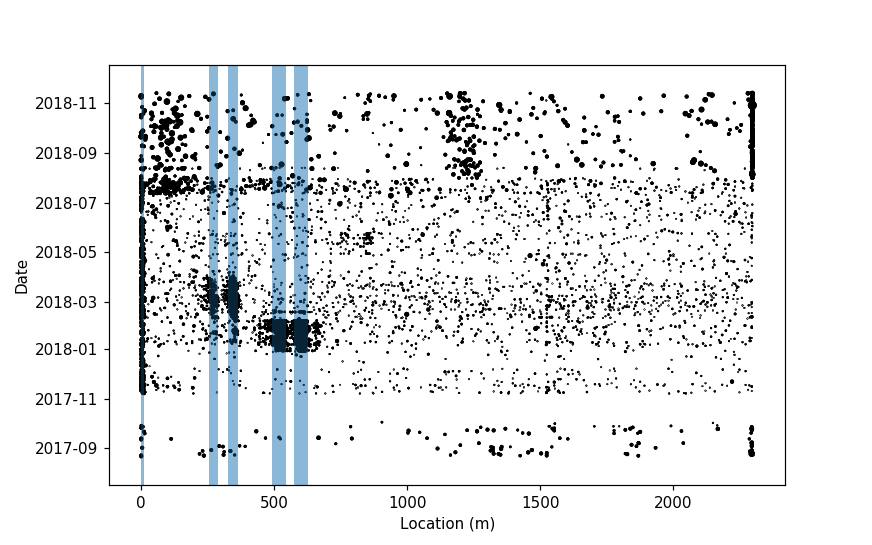

In [8]:
%matplotlib notebook
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = [8, 5]

clusterizer.plot.draw_location_time_scatter(circuit)
plt.show()

In [92]:
clusters, bins, bin_contents, rate = clusterizer.algorithms.clusterize_poisson(circuit)
clusters_list = list(sorted(clusters))
print(clusters_list)
clusterizer.plot.draw_location_time_scatter(circuit)
clusterizer.plot.overlay_cluster_collection(clusters_list)
plt.show()

 to 12m, 256m to 288m, 328m to 364m, 492m to 544m, 576m to 628m]


# Cluster Ensemble

Clusters hebben een attribuut found_by. Een cluster ensemble is een set van sets van clusters die deze attributen bijhoudt en overlappende clusters bij elkaar stopt.

In [16]:
cluster = clusters_list[1]
cluster.get_partial_discharges(circuit)

Date/time (UTC)  Location in meters (m)  Charge (picocoulomb)
7797   2017-08-29 19:29:00              263.183690               23619.5
37998  2017-11-08 23:13:00              284.073216                 393.5
69287  2017-12-20 04:10:00              277.121096                1764.5
69387  2017-12-20 06:32:00              274.802091                1715.0
75957  2017-12-28 01:43:00              256.250051                2527.5
83495  2018-01-07 08:11:00              277.122320                1875.0
84279  2018-01-08 04:42:00              265.527244                1047.5
88950  2018-01-12 23:06:00              274.803304                1918.0
90884  2018-01-14 21:19:00              281.760350                6846.5
92402  2018-01-17 01:41:00              256.251183                7128.0
94252  2018-01-19 12:13:00              284.079365                1220.0
95032  2018-01-20 08:06:00              279.441335                7205.5
95213  2018-01-20 13:33:00              260.889213                2073.5
95258  2018-01-20 15:06:00              272.484289                1983.5
95654  2018-01-21 04:09:00              281.760350                2853.0
95987  2018-01-21 12:02:00              270.165274               10988.0
96983  2018-01-22 18:08:00              284.079365                2615.5
97347  2018-01-23 02:51:00              270.165274                1074.5
97390  2018-01-23 03:34:00              279.441335                7208.0
103515 2018-01-29 08:05:00              286.398381                1737.0
108099 2018-02-03 04:00:00              274.806492                4804.0
109312 2018-02-04 08:05:00              274.806492                 857.5
110112 2018-02-05 03:03:00              284.082660                 802.0
111242 2018-02-08 00:37:00              279.444576                 881.5
111488 2018-02-08 05:02:00              277.125534                3246.5
112342 2018-02-09 02:11:00              267.849365               10740.0
112450 2018-02-09 04:03:00              284.082660                3421.0
112865 2018-02-09 13:32:00              270.168408                3716.5
113015 2018-02-09 17:18:00              277.125534                1255.5
113071 2018-02-09 18:26:00              277.125534               19402.5
...                    ...                     ...                   ...
185863 2018-04-26 04:13:00              256.233966                 599.5
188172 2018-04-28 06:35:00              270.147123                1081.0
188437 2018-04-28 14:34:00              286.379139                1711.0
195023 2018-05-06 07:08:00              277.091265                1079.5
202124 2018-05-13 06:07:00              279.410020                1391.5
205902 2018-05-17 00:30:00              286.366286                 516.0
210016 2018-05-21 03:44:00              281.728775                2162.0
210967 2018-05-22 03:17:00              260.859977                 697.5
211949 2018-05-23 02:50:00              267.816243                6531.0
212008 2018-05-23 03:50:00              284.047531                 622.5
216220 2018-05-27 06:31:00              270.134999                 573.5
230860 2018-06-11 14:44:00              273.661864                1259.5
240487 2018-06-20 19:32:00              285.307050                 887.0
250512 2018-07-01 01:08:00              266.655057                 529.5
257371 2018-07-07 22:09:00              257.339596                 742.0
262438 2018-07-13 02:21:00              259.668461                 891.5
263403 2018-07-14 00:30:00              271.312787                1069.5
263539 2018-07-14 03:03:00              259.668461                1161.0
265713 2018-07-16 04:21:00              278.299382                9577.5
267269 2018-07-17 15:44:00              257.339596               11022.5
267494 2018-07-17 22:10:00              266.655057               16253.5
268904 2018-07-19 05:46:00              266.655057               11288.0
271042 2018-07-21 06:20:00              275.970517               1496

In [19]:
clusterset = clusterizer.ensemble.ClusterSet(clusters)
clusterset.get_partial_discharges(circuit)

Date/time (UTC)  Location in meters (m)  Charge (picocoulomb)
0     2017-08-22 00:25:00                0.000000               25141.5
1     2017-08-23 06:26:00                0.000000               22192.5
2     2017-09-01 14:37:00                3.478287               26809.0
3     2017-09-11 17:00:00                0.000000               20784.0
4     2017-09-12 23:05:00                0.000000               27518.0
5     2017-09-21 10:04:00               10.434861               24923.0
6     2017-09-26 01:12:00                0.000000               19918.0
7     2017-09-26 09:21:00                0.000000               24085.5
8     2017-09-27 15:01:00                5.797145               19732.0
9     2017-09-28 21:24:00                0.000000                2191.0
10    2017-09-29 02:16:00                0.000000               11980.0
11    2017-11-07 18:12:00               10.435343               20157.0
12    2017-11-08 14:24:00                8.116378               26393.0
13    2017-11-08 15:26:00                5.797413               32284.0
14    2017-11-09 07:01:00                5.797413                1490.5
15    2017-11-11 09:12:00                0.000000               22999.0
16    2017-11-11 19:37:00                0.000000               22568.0
17    2017-11-11 19:37:00               10.435343               13703.0
18    2017-11-12 00:12:00                0.000000               13999.5
19    2017-11-13 17:24:00                3.478448               15617.0
20    2017-11-14 08:34:00                8.116378               22955.5
21    2017-11-14 15:02:00                0.000000               24191.0
22    2017-11-15 18:17:00                5.797413               22449.0
23    2017-11-16 01:10:00                5.797413               21755.0
24    2017-11-16 11:34:00                0.000000               19641.5
25    2017-11-16 11:34:00                0.000000               22426.0
26    2017-11-16 19:08:00               10.435343               20249.0
27    2017-11-16 19:09:00                0.000000               13799.5
28    2017-11-17 23:26:00                0.000000               20862.5
29    2017-11-18 08:23:00                0.000000               22072.5
...                   ...                     ...                   ...
10287 2018-04-26 04:13:00              256.233966                 599.5
10288 2018-04-28 06:35:00              270.147123                1081.0
10289 2018-04-28 14:34:00              286.379139                1711.0
10290 2018-05-06 07:08:00              277.091265                1079.5
10291 2018-05-13 06:07:00              279.410020                1391.5
10292 2018-05-17 00:30:00              286.366286                 516.0
10293 2018-05-21 03:44:00              281.728775                2162.0
10294 2018-05-22 03:17:00              260.859977                 697.5
10295 2018-05-23 02:50:00              267.816243                6531.0
10296 2018-05-23 03:50:00              284.047531                 622.5
10297 2018-05-27 06:31:00              270.134999                 573.5
10298 2018-06-11 14:44:00              273.661864                1259.5
10299 2018-06-20 19:32:00              285.307050                 887.0
10300 2018-07-01 01:08:00              266.655057                 529.5
10301 2018-07-07 22:09:00              257.339596                 742.0
10302 2018-07-13 02:21:00              259.668461                 891.5
10303 2018-07-14 00:30:00              271.312787                1069.5
10304 2018-07-14 03:03:00              259.668461                1161.0
10305 2018-07-16 04:21:00              278.299382                9577.5
10306 2018-07-17 15:44:00              257.339596               11022.5
10307 2018-07-17 22:10:00              266.655057               16253.5
10308 2018-07-19 05:46:00              266.655057               11288.0
10309 2018-07-21 06:20:00              275.970517               14961.0
10310 2018-07-22 09:33:00              266.655057 

In [93]:
time_range = (pd.Timestamp(np.datetime64("2018-06-01")), pd.Timestamp(np.datetime64("2019-01-01")))
time_cluster = clusterizer.cluster.Cluster(time_range=time_range)
timeclusterset = clusterizer.ensemble.ClusterSet([time_cluster])
combined = clusterset & timeclusterset

In [97]:
beginning = clusterizer.ensemble.ClusterSet(clusters_list[:2])
mod = clusterizer.ensemble.ClusterSet(set())
for cluster in beginning:
    location_range = (cluster.location_range[0] + 1, cluster.location_range[1] + 1)
    mod.clusters.add(clusterizer.cluster.Cluster(location_range=location_range))
end = clusterizer.ensemble.ClusterSet(clusters_list[2:])
print("Beginning:\n" + str(mod) + '\n')
print("End:\n" + str(end) + '\n')
print("Combined:\n" + str(mod + end))

Beginning:
1m to 13m
257m to 289m

End:
328m to 364m
492m to 544m
576m to 628m

Combined:
1m to 13m
257m to 289m
328m to 364m
492m to 544m
576m to 628m


In [156]:
clusterizer.ensemble.ClusterEnsemble.from_iterable(clusters_list)

{{0m to 12m}
{256m to 288m}
{576m to 628m}
{492m to 544m}
{328m to 364m}}